# Week 10

# Build a bidirectional Recurrent Neural Network for any one application Workspace .

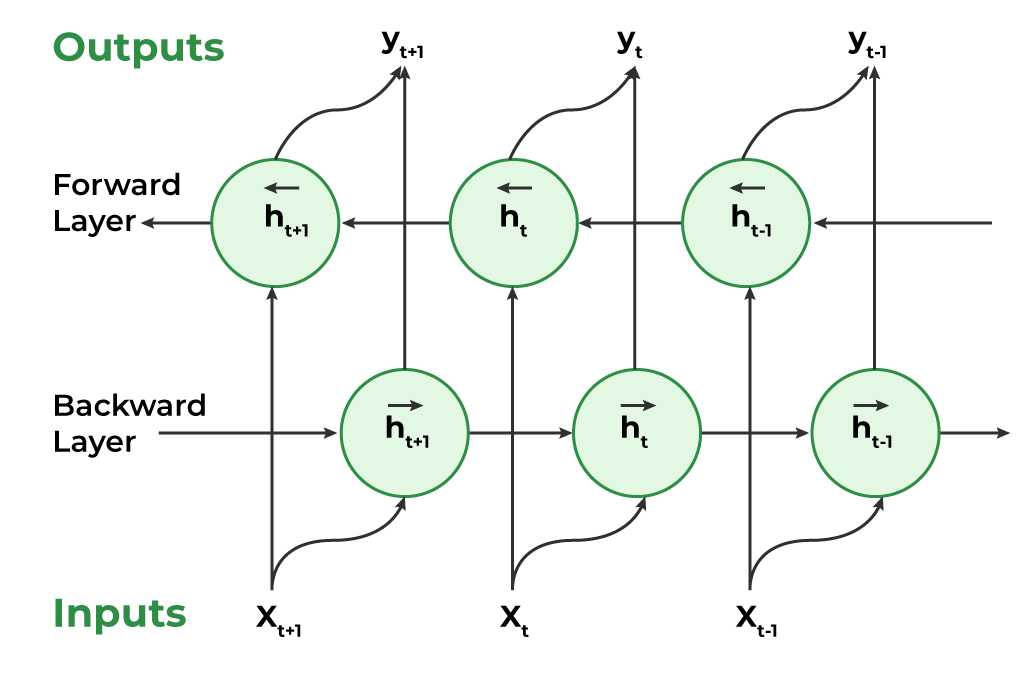

Short explanation
- *Data*:IMDB provides movie reviews already tokenized into integer word-indices. We limit vocabulary to the top 10k common words and pad/truncate all reviews to length 200.

- *Embedding*:The Embedding layer learns dense vector representations for tokens (words). Input shape becomes (batch, 200, 64).
- *Bidirectional LSTM*:Bidirectional(layers.LSTM(...)) runs an LSTM forward and another LSTM backward, then concatenates their final outputs. This allows the model to use both past and future context when making a decision about a token/sequence.

- *Why bidirectional?*:For tasks where the entire sequence is available (like classifying a full review), reading both directions often improves performance because the model can see words that occur later in the sentence which may change the meaning of earlier words.

- *Loss&output*:We use sigmoid + binary_crossentropy because IMDB is a binary sentiment task (positive/negative).

In [2]:
# bidirectional_rnn_imdb.py
# Simple Bidirectional RNN (LSTM) for IMDB sentiment classification
# Requirements: tensorflow (tested on TF 2.x)

import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
import numpy as np

# 1) Hyperparameters (small so the example runs quickly)
NUM_WORDS = 10000        # use top 10k words
MAXLEN = 200             # truncate/pad reviews to 200 tokens
EMBED_DIM = 64           # embedding size
RNN_UNITS = 64           # LSTM hidden units
BATCH_SIZE = 64
EPOCHS = 3               # small for demo; increase for better accuracy

# 2) Load dataset (pre-tokenized integer sequences)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

# 3) Inspect (optional)
print("Train samples:", len(x_train), "Test samples:", len(x_test))

# 4) Pad sequences so they are all the same length
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=MAXLEN, padding="post", truncating="post")
x_test  = preprocessing.sequence.pad_sequences(x_test,  maxlen=MAXLEN, padding="post", truncating="post")

# 5) Build the model
# Explanation:
# - Embedding maps token IDs -> dense vectors
# - Bidirectional wraps an LSTM so the sequence is read left->right and right->left
# - We use a small Dense head for binary classification
model = models.Sequential([
    layers.Input(shape=(MAXLEN,), dtype="int32"),
    layers.Embedding(input_dim=NUM_WORDS, output_dim=EMBED_DIM, input_length=MAXLEN),
    # You can swap the LSTM for SimpleRNN or GRU if you want to demonstrate vanilla RNN or GRU.
    layers.Bidirectional(layers.LSTM(RNN_UNITS, return_sequences=False)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # binary output
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# 6) Train (small number of epochs for demonstration)
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2
)

# 7) Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# 8) Quick prediction example
sample_idx = 0
sample_input = np.expand_dims(x_test[sample_idx], axis=0)
pred = model.predict(sample_input)[0,0]
print(f"\nExample review label={y_test[sample_idx]} predicted_prob={pred:.4f}")


Train samples: 25000 Test samples: 25000


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 710,209 (2.71 MB)

 Trainable params: 710,209 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
313/313 - 41s - 130ms/step - accuracy: 0.6859 - loss: 0.5724 - val_accuracy: 0.8326 - val_loss: 0.3994
Epoch 2/3
313/313 - 38s - 120ms/step - accuracy: 0.8748 - loss: 0.3171 - val_accuracy: 0.8478 - val_loss: 0.3547
Epoch 3/3
313/313 - 38s - 123ms/step - accuracy: 0.9161 - loss: 0.2259 - val_accuracy: 0.8634 - val_loss: 0.3634
782/782 - 17s - 22ms/step - accuracy: 0.8456 - loss: 0.4027

Test accuracy: 0.8456, Test loss: 0.4027
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step

Example review label=0 predicted_prob=0.0165
